The term customer churn refers to customers stopping their consumption of a company's services and/or products. Churn Prediction is a process whereby a model is designed to predict whether a customer is likely to churn. </br>
As opposed to the previous chapter, where the result of the prediction could've been any number; churn prediction is a <b>binary classification</b> problem where the possible outcome could either be the condition where the customer churns and the outcome where the customer won't churn.  </br>
 </br>
Once the likelihood of churning is found out, the company can then send out promotional messages including discounts and offers to the customer in order to encourge them to keep using the company's services

<b>Dataset :</b> https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Customer_data.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


This dataframe has wayy to many columns to fit on the screen at the same time. So we transpose the dataframe to see all the columns at once

In [3]:
pd.read_csv('Customer_data.csv').head().T


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
#Editing the column names
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
categorical_columns

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [6]:
# making the values of columns having dtypes as object to be uniform.
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [7]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [8]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

Here, we can see that the column totalcharges has the dtype object even though it contains numbers. In this case pandas can be used to convert the object type into numeric type.

In [9]:
# the keyword 'coerce' is used to skip any value that cannot be converted to a numeric value
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [10]:
df[tc.isnull()][['customerid','totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


Some of the rows in the total charges columns are null. Filling in the null value with zero

In [11]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce')

In [12]:
df.totalcharges = df.totalcharges.fillna(0)

In [13]:
df.totalcharges.isnull().sum()

0


#### Analysing the target variable.

In [14]:
df.churn

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

The churn variable has categorical values. However, for binary classification the model requires numerical values. We can use the astype function to convert the object type to boolean value

In [15]:
df.churn = (df.churn == 'yes').astype(int)

In [16]:
df.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int32

#
## Validation Framework

Using scikit learn to split the dataset into train, validation and testing groups.

In [22]:
!pip install scikit-learn

     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
     ---------------------------------------- 0.1/9.2 MB 787.7 kB/s eta 0:00:12
      --------------------------------------- 0.1/9.2 MB 1.1 MB/s eta 0:00:09
      --------------------------------------- 0.2/9.2 MB 1.1 MB/s eta 0:00:09
     - -------------------------------------- 0.2/9.2 MB 1.2 MB/s eta 0:00:08
     - -------------------------------------- 0.3/9.2 MB 1.3 MB/s eta 0:00:08
     - -------------------------------------- 0.4/9.2 MB 1.2 MB/s eta 0:00:08
     - -------------------------------------- 0.4/9.2 MB 1.2 MB/s eta 0:00:08
     -- ------------------------------------- 0.5/9.2 MB 1.3 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/9.2 MB 1.2 MB/s eta 0:00:07
     -- ------------------------------------- 0.7/9.2 MB 1.3 MB/s eta 0:00:07
     --- ------------------------------------ 0.7/9.2 MB 1.3 MB/s eta 0:00:0

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state = 1)

train_test_split function takes in three paramenters: </br>
1. First parameter is the dataset that is to be split.
2. Second parameter is the size of the dataset that is to be set aside i.e the test set
3. Third parmeter is the random_state value which ensures the dataset is shuffled in the exact way every time the code is run.</br>
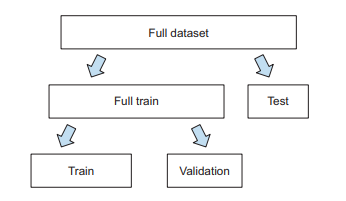

In [25]:
#Splitting the full train into train and validation datasets.

df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state=1)

In [26]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [28]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [29]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [31]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [34]:
df_train_full = df_train_full.reset_index(drop = True)

#
## Exploratory Data Analysis

In [35]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [37]:
# Checking the distribution of the target variable
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [38]:
df_train_full.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

We can see that 27% of the customers chose to stop using the company's services. This is also called the churn rate. Another way of calculating the churn rate is calculating the mean.

In [39]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

The dataset is an <b>imbalanced datset</b> because the number of users who chose not to churn is three times the number of users who chose to churn. </br></br>
A <b> balanced dataset </b> on the other hand is the dataset where both of the classes are equally distributed.

In [42]:
# Listing the categorical and numerical variables
numerical = ['tenure', 'monthlycharges','totalcharges']
categorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [46]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

#
## Feature Importance : Churn Rate and Risk Ratio

In [47]:
df_train_full

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1
